In [ ]:
import pandas as pd
import os
from datetime import datetime

## Get Weekly Sale

In [3]:
df = pd.read_csv("ml_analytics_202504181528.csv")

In [4]:
df["ts"] = [datetime.strptime(i, '%Y-%m-%d') for i in df["order_date"]]

In [5]:
df

,order_date,product_name,product_categories,quantity,unit_price,total_price,day_of_week,week,month,year,ts
0,2024-12-31,Microwave Oven,Kitchen Appliances,2,99,198,2,1,12,2024,2024-12-31
1,2024-12-31,Electric Kettle,Kitchen Appliances,5,39,195,2,1,12,2024,2024-12-31
2,2024-12-31,Refrigerator,Big Kitchen Appliances,1,999,999,2,1,12,2024,2024-12-31
3,2024-12-31,HP,Laptops,4,799,3196,2,1,12,2024,2024-12-31
4,2024-12-31,Samsung,Laptops,4,749,2996,2,1,12,2024,2024-12-31
...,...,...,...,...,...,...,...,...,...,...,...
9995,2022-01-01,MacBook,Laptops,5,1299,6495,6,52,1,2022,2022-01-01
9996,2022-01-01,Dell,Laptops,1,899,899,6,52,1,2022,2022-01-01
9997,2022-01-01,Range Hood,Big Kitchen Appliances,3,450,1350,6,52,1,2022,2022-01-01
9998,2022-01-01,Refrigerator,Big Kitchen Appliances,5,999,4995,6,52,1,2022,2022-01-01


In [6]:
df["product_name"].unique()

array(['Microwave Oven', 'Electric Kettle', 'Refrigerator', 'HP',
       'Samsung', 'Coffee Maker', 'iPhone', 'Mixer', 'Dish Washer',
       'MacBook', 'Acer', 'Range Hood', 'Dell', 'Toaster', 'Stove',
       'Xiaomi'], dtype=object)

In [7]:
df[df["product_name"] == df["product_name"].unique()[0]].sort_values("order_date", ascending=False)

,order_date,product_name,product_categories,quantity,unit_price,total_price,day_of_week,week,month,year,ts
0,2024-12-31,Microwave Oven,Kitchen Appliances,2,99,198,2,1,12,2024,2024-12-31
5,2024-12-31,Microwave Oven,Kitchen Appliances,4,99,396,2,1,12,2024,2024-12-31
25,2024-12-28,Microwave Oven,Kitchen Appliances,3,99,297,6,52,12,2024,2024-12-28
42,2024-12-25,Microwave Oven,Kitchen Appliances,4,99,396,3,52,12,2024,2024-12-25
71,2024-12-22,Microwave Oven,Kitchen Appliances,2,99,198,0,51,12,2024,2024-12-22
...,...,...,...,...,...,...,...,...,...,...,...
9902,2022-01-10,Microwave Oven,Kitchen Appliances,2,99,198,1,2,1,2022,2022-01-10
9929,2022-01-08,Microwave Oven,Kitchen Appliances,4,99,396,6,1,1,2022,2022-01-08
9943,2022-01-07,Microwave Oven,Kitchen Appliances,3,99,297,5,1,1,2022,2022-01-07
9944,2022-01-07,Microwave Oven,Kitchen Appliances,5,99,495,5,1,1,2022,2022-01-07


In [8]:
def get_weekly_data(tmp : pd.DataFrame, week_range : pd.date_range):
    
    weekly_data = []

    for week_ in week_range:
        
        tmp_subset = tmp[(tmp["ts"]>= week_) & (tmp["ts"]< week_ + pd.offsets.Week(1))]
        
        total_quantity = int(tmp_subset["quantity"].sum())
        total_price = int(tmp_subset["total_price"].sum())
        
        if total_quantity == 0:
            avg_price = 0
        else:       
            avg_price = total_price / total_quantity
        
        tmp_dict = {
            "begin": week_,
            "end": week_ + pd.offsets.Week(1),
            "quantity": total_quantity,
            "avg_price": avg_price,
            "sale": total_price
        }
        
        weekly_data.append(tmp_dict)
    
    return weekly_data

In [9]:
def get_monthly_data(tmp : pd.DataFrame, month_range : pd.date_range):
    
    monthly_data = []

    for month_ in month_range:
        
        tmp_subset = tmp[(tmp["ts"]>= month_) & (tmp["ts"]< month_ + pd.offsets.MonthBegin())]
        
        total_quantity = int(tmp_subset["quantity"].sum())
        total_price = int(tmp_subset["total_price"].sum())
        
        if total_quantity == 0:
            avg_price = 0
        else:       
            avg_price = total_price / total_quantity
        
        tmp_dict = {
            "begin": month_,
            "end": month_ + pd.offsets.MonthBegin(),
            "quantity": total_quantity,
            "avg_price": avg_price,
            "sale": total_price
        }
        
        monthly_data.append(tmp_dict)
    
    return monthly_data

In [10]:

# os.mkdir("products_df")

for product_ in df["product_name"].unique():
    
    tmp = df[df["product_name"] == product_]
    week_range = pd.date_range(
                        start=min(tmp["ts"]) - pd.offsets.Week(1),
                        end=max(tmp["ts"]), #  + pd.offsets.Week(1)
                        freq="W-Mon")

    month_range = pd.date_range(
                        start=min(tmp["ts"]) - pd.offsets.Week(1),
                        end=max(tmp["ts"]), #  + pd.offsets.Week(1)
                        freq="MS")


    tmp_df_weekly = get_weekly_data(tmp, week_range)
    tmp_df_monthly = get_monthly_data(tmp, month_range)
    tmp_df_weekly = pd.DataFrame(tmp_df_weekly)
    tmp_df_monthly = pd.DataFrame(tmp_df_monthly)
    
    tmp_df_weekly["product_name"] = [product_] * len(tmp_df_weekly)
    tmp_df_monthly["product_name"] = [product_] * len(tmp_df_monthly)
    
    tmp_df_weekly.to_csv(f"products_df/{product_}_weekly_sale.csv", index=False)
    tmp_df_monthly.to_csv(f"products_df/{product_}_monthly_sale.csv", index=False)
    



In [11]:
tmp_df_weekly["begin"][0] + pd.offsets.MonthBegin()

Timestamp('2022-02-01 00:00:00')

In [12]:
tmp_df_weekly

,begin,end,quantity,avg_price,sale,product_name
0,2022-01-03,2022-01-10,9,499.0,4491,Xiaomi
1,2022-01-10,2022-01-17,5,499.0,2495,Xiaomi
2,2022-01-17,2022-01-24,5,499.0,2495,Xiaomi
3,2022-01-24,2022-01-31,9,499.0,4491,Xiaomi
4,2022-01-31,2022-02-07,9,499.0,4491,Xiaomi
...,...,...,...,...,...,...
151,2024-11-25,2024-12-02,5,499.0,2495,Xiaomi
152,2024-12-02,2024-12-09,17,499.0,8483,Xiaomi
153,2024-12-09,2024-12-16,27,499.0,13473,Xiaomi
154,2024-12-16,2024-12-23,10,499.0,4990,Xiaomi


In [13]:
tmp_df_monthly

,begin,end,quantity,avg_price,sale,product_name
0,2022-01-01,2022-02-01,28,499.0,13972,Xiaomi
1,2022-02-01,2022-03-01,53,499.0,26447,Xiaomi
2,2022-03-01,2022-04-01,29,499.0,14471,Xiaomi
3,2022-04-01,2022-05-01,57,499.0,28443,Xiaomi
4,2022-05-01,2022-06-01,69,499.0,34431,Xiaomi
5,2022-06-01,2022-07-01,46,499.0,22954,Xiaomi
6,2022-07-01,2022-08-01,31,499.0,15469,Xiaomi
7,2022-08-01,2022-09-01,41,499.0,20459,Xiaomi
8,2022-09-01,2022-10-01,34,499.0,16966,Xiaomi
9,2022-10-01,2022-11-01,33,499.0,16467,Xiaomi


In [14]:
for product_ in df["product_name"].unique():
    
    monthly_df = df[df["product_name"]==product_].resample('MS', on='ts')['quantity'].sum().reset_index()
    weekly_df = df[df["product_name"]==product_].resample('W-Mon', on='ts')['quantity'].sum().reset_index()

In [15]:
from matplotlib import pyplot as plt

In [16]:
tmp_df_weekly = pd.read_csv("products_df/Electric Kettle_weekly_sale.csv")
tmp_df_monthly = pd.read_csv("products_df/Electric Kettle_monthly_sale.csv")

In [17]:
def get_plot(df):
    
    plt.figure(figsize=(10, 5))
    plt.plot(df['begin'], df['quantity'], marker='o', linestyle='-', color='b')
    plt.title('Quantity Over Time')
    plt.xlabel('Begin Date')
    plt.ylabel('Quantity')

    # Set x-ticks to show only a fraction of the dates
    num_ticks = max(1, len(df) // 10)  # Calculate number of ticks (1/10th of the data length)
    plt.xticks(df['begin'][::num_ticks], rotation=45)  # Show every num_ticks-th date

    plt.grid()
    plt.tight_layout()
    plt.show()

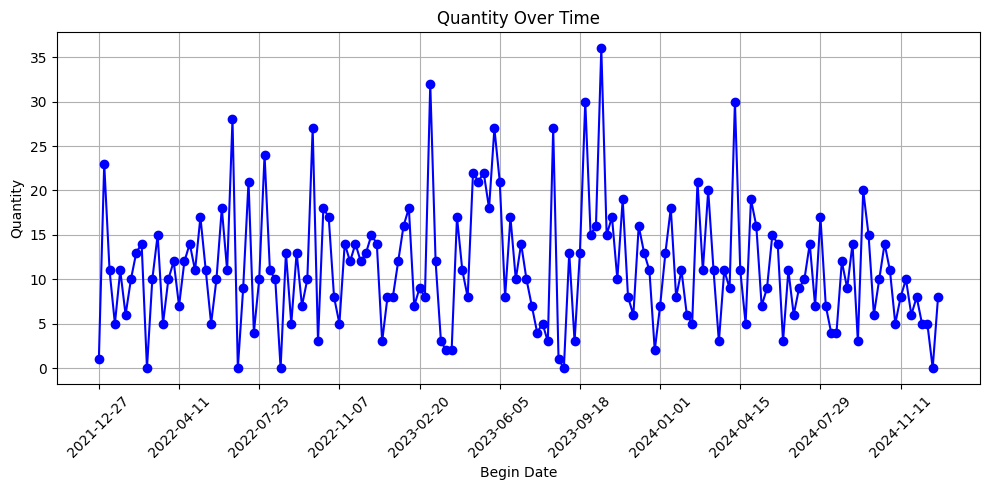

In [18]:
get_plot(tmp_df_weekly)

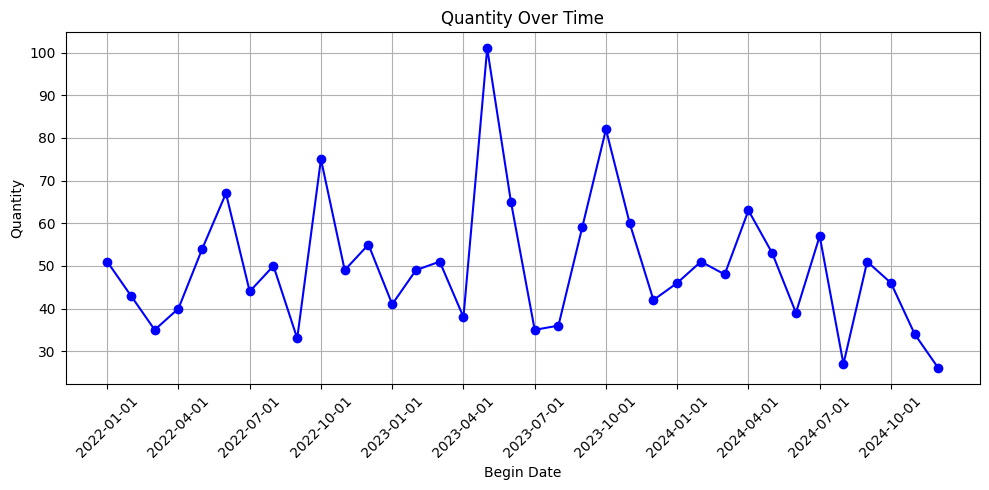

In [19]:
get_plot(tmp_df_monthly)

In [20]:
# lightgbm
# xgboost
# lstm
# Arima

In [21]:
tmp_df_weekly

,begin,end,quantity,avg_price,sale,product_name
0,2021-12-27,2022-01-03,1,39.0,39,Electric Kettle
1,2022-01-03,2022-01-10,23,39.0,897,Electric Kettle
2,2022-01-10,2022-01-17,11,39.0,429,Electric Kettle
3,2022-01-17,2022-01-24,5,39.0,195,Electric Kettle
4,2022-01-24,2022-01-31,11,39.0,429,Electric Kettle
...,...,...,...,...,...,...
153,2024-12-02,2024-12-09,8,39.0,312,Electric Kettle
154,2024-12-09,2024-12-16,5,39.0,195,Electric Kettle
155,2024-12-16,2024-12-23,5,39.0,195,Electric Kettle
156,2024-12-23,2024-12-30,0,0.0,0,Electric Kettle


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [23]:
tmp_df_weekly

,begin,end,quantity,avg_price,sale,product_name
0,2021-12-27,2022-01-03,1,39.0,39,Electric Kettle
1,2022-01-03,2022-01-10,23,39.0,897,Electric Kettle
2,2022-01-10,2022-01-17,11,39.0,429,Electric Kettle
3,2022-01-17,2022-01-24,5,39.0,195,Electric Kettle
4,2022-01-24,2022-01-31,11,39.0,429,Electric Kettle
...,...,...,...,...,...,...
153,2024-12-02,2024-12-09,8,39.0,312,Electric Kettle
154,2024-12-09,2024-12-16,5,39.0,195,Electric Kettle
155,2024-12-16,2024-12-23,5,39.0,195,Electric Kettle
156,2024-12-23,2024-12-30,0,0.0,0,Electric Kettle


In [24]:
# df_weekly

In [25]:
tmp_df_weekly["ts_begin"] = [datetime.strptime(i, '%Y-%m-%d') for i in tmp_df_weekly["begin"]]

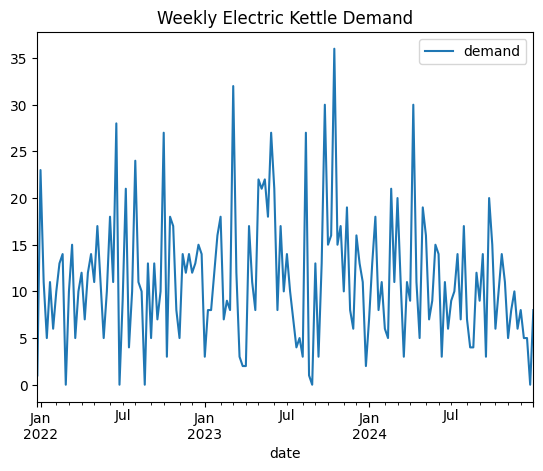

In [26]:
# Load data (assuming 'ts' is the datetime column)
# df = pd.read_csv("samsung_sales.csv", parse_dates=['ts'])
# df = df[df['product_name'] == 'Samsung']  # Filter Samsung products


df_weekly = tmp_df_weekly.resample('W-Mon', on='ts_begin')['quantity'].sum().reset_index()
df_weekly.columns = ['date', 'demand']
df_weekly.set_index('date', inplace=True)

# Plot
df_weekly.plot(title=f"Weekly {tmp_df_weekly['product_name'][0]} Demand")
plt.show()

In [27]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    return result[1] > 0.05  # True if non-stationary

is_non_stationary = adf_test(df_weekly['demand'])
print("Non-stationary?", is_non_stationary)

ADF Statistic: -12.200556423728337
p-value: 1.2260238770098005e-22
Non-stationary? False


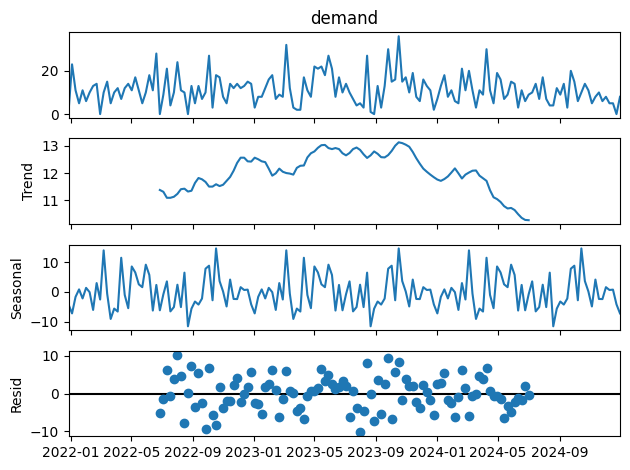

In [28]:
decomposition = seasonal_decompose(df_weekly['demand'], model='additive')
decomposition.plot()
plt.show()

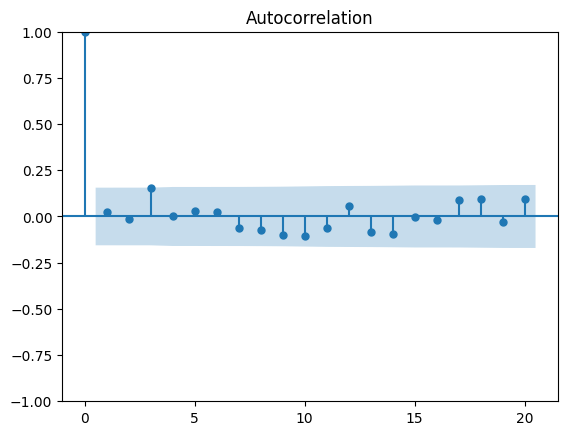

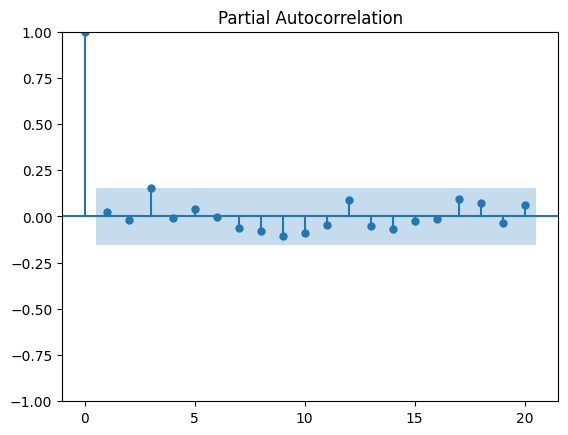

In [29]:
## Arima

plot_acf(df_weekly['demand'].dropna(), lags=20)
plot_pacf(df_weekly['demand'].dropna(), lags=20)
plt.show()

In [30]:
from statsmodels.tsa.arima.model import ARIMA

# Split train-test (last 12 weeks for testing)
train, test = df_weekly[:-12], df_weekly[-12:]

# Fit ARIMA(1,1,1)
model_arima = ARIMA(train['demand'], order=(1,1,1))
results_arima = model_arima.fit()

# Forecast
forecast_arima = results_arima.forecast(steps=12)

# Evaluate
mae_arima = mean_absolute_error(test['demand'], forecast_arima)
print("ARIMA MAE:", mae_arima)

ARIMA MAE: 4.570881144655066


In [31]:
### SARIMA Model

In [32]:
# from pmdarima import auto_arima

# model_sarima = auto_arima(
#     train['demand'],
#     seasonal=True, m=52,
#     stepwise=True, trace=True
# )
# print(model_sarima.summary())

# # Forecast
# forecast_sarima = model_sarima.predict(n_periods=12)

# # Evaluate
# mae_sarima = mean_absolute_error(test['demand'], forecast_sarima)
# print("SARIMA MAE:", mae_sarima)

In [33]:
# import numpy

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Manually set (p,d,q)(P,D,Q,s)
model_sarima = SARIMAX(
    train['demand'],
    order=(1, 1, 1),          # Non-seasonal (p,d,q)
    seasonal_order=(1, 1, 1, 52)  # Seasonal (P,D,Q,s)
)
results_sarima = model_sarima.fit()
forecast_sarima = results_sarima.forecast(steps=12)

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming:
# - 'test' is your test dataset with actual demand values
# - 'forecast_sarima' contains the 12-step forecast

# 1. Align test data with forecast period
test_values = test['demand'].values[-12:]  # Last 12 actual values

# 2. Calculate MAE and RMSE
mae_sarima = mean_absolute_error(test_values, forecast_sarima)
rmse = np.sqrt(mean_squared_error(test_values, forecast_sarima))

print(f"MAE: {mae_sarima:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 5.70
RMSE: 7.00


In [36]:
# conda install -c conda-forge pmdarima 


In [37]:
##  for me above one worked

In [38]:
# pip install pmdarima

In [39]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_weekly[['demand']])

# Create sequences (lookback=12 weeks)
def create_dataset(data, lookback=12):
    X, y = [], []
    for i in range(len(data)-lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)
X_train, X_test = X[:-12], X[-12:]
y_train, y_test = y[:-12], y[-12:]

# Reshape for LSTM (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [40]:
# model_lstm = Sequential()
# model_lstm.add(LSTM(20, activation='relu', input_shape=(12, 1)))
# model_lstm.add(LSTM(1, activation='relu'))
# model_lstm.add(Dense(1))
# model_lstm.compile(optimizer='adam', loss='mae')


model_lstm = Sequential()
# First LSTM layer - must return sequences to feed to next LSTM layer
model_lstm.add(LSTM(20, activation='relu', return_sequences=True, input_shape=(12, 1)))
# Second LSTM layer - doesn't return sequences (going to Dense next)
model_lstm.add(LSTM(10, activation='relu'))  # Reduced units for second layer
# Output layer
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mae')

model_lstm.fit(X_train, y_train, epochs=65, batch_size=128, verbose=0)

# Forecast
forecast_lstm = model_lstm.predict(X_test)
forecast_lstm = scaler.inverse_transform(forecast_lstm)

# Evaluate
mae_lstm = mean_absolute_error(test['demand'], forecast_lstm)
print("LSTM MAE:", mae_lstm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
LSTM MAE: 4.0745673179626465


In [ ]:
def create_features(df):
    df['lag1'] = df['demand'].shift(1)
    df['lag2'] = df['demand'].shift(2)
    df['rolling_mean'] = df['demand'].rolling(4).mean()
    df['month'] = df.index.month
    df['week'] = df.index.isocalendar().week
    return df.dropna()

df_features = create_features(df_weekly.copy())
train, test = df_features[:-12], df_features[-12:]

In [42]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(n_estimators=200)
model_xgb.fit(train.drop('demand', axis=1), train['demand'])

forecast_xgb = model_xgb.predict(test.drop('demand', axis=1))
mae_xgb = mean_absolute_error(test['demand'], forecast_xgb)
print("XGBoost MAE:", mae_xgb)

XGBoost MAE: 3.07794189453125


In [43]:
from lightgbm import LGBMRegressor

model_lgbm = LGBMRegressor()
model_lgbm.fit(train.drop('demand', axis=1), train['demand'])

forecast_lgbm = model_lgbm.predict(test.drop('demand', axis=1))
mae_lgbm = mean_absolute_error(test['demand'], forecast_lgbm)
print("LightGBM MAE:", mae_lgbm)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 143
[LightGBM] [Info] Number of data points in the train set: 143, number of used features: 5
[LightGBM] [Info] Start training from score 11.685315
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [44]:
# pip install tensorflow

In [45]:
# pip install mlflow

In [46]:
import mlflow

In [49]:
# Save model to file first
model_path = "lgbm_model.txt"
model_lgbm.booster_.save_model(model_path)


In [60]:
import mlflow.sklearn
import mlflow.sklearn
import mlflow.sklearn
import mlflow.xgboost


mlflow.set_experiment("Commerce ML")
mlflow.set_tracking_uri("http://127.0.0.1:5000/")


with mlflow.start_run(run_name="LGBMRegressor"):
    mlflow.log_param("model_name", "LGBMRegressor")
    mlflow.log_metrics({
        "mae": round(mae_lgbm, 4)
    })
    mlflow.lightgbm.log_model(model_lgbm, "LGBMRegressor")

print("done: lgbm")


with mlflow.start_run(run_name="XGBoostRegressor"):
    mlflow.log_param("model_name", "XGBoostRegressor")
    mlflow.log_metrics({
        "mae": round(mae_xgb, 4)
    })
    mlflow.xgboost.log_model(model_xgb, "XGBoostRegressor")

print("done: xgboost")

with mlflow.start_run(run_name="LSTM"):
    mlflow.log_param("model_name", "LSTM")
    mlflow.log_metrics({
        "mae": round(mae_lstm, 4)
    })
    mlflow.sklearn.log_model(model_lstm, "LSTM")

print("done: lstm")

with mlflow.start_run(run_name="ARIMA"):
    mlflow.log_param("model_name", "ARIMA")
    mlflow.log_metrics({
        "mae": round(mae_arima, 4)
    })
    mlflow.sklearn.log_model(model_arima, "ARIMA")

print("done: arima")

with mlflow.start_run(run_name="SARIMA"):
    mlflow.log_param("model_name", "SARIMA")
    mlflow.log_metrics({
        "mae": round(mae_sarima, 4)
    })
    mlflow.sklearn.log_model(model_sarima, "SARIMA")

print("done: sarima")

2025/04/18 23:06:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LGBMRegressor at: http://127.0.0.1:5000/#/experiments/696442527046136642/runs/18d857abb3bc4e19bddb6ff10fc3ec56
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/696442527046136642
done: lgbm


2025/04/18 23:06:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGBoostRegressor at: http://127.0.0.1:5000/#/experiments/696442527046136642/runs/296f15b07d294b249933a6a5abb315cc
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/696442527046136642
done: xgboost


2025/04/18 23:06:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LSTM at: http://127.0.0.1:5000/#/experiments/696442527046136642/runs/0f0b1314cf2943968653b362915f21ab
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/696442527046136642
done: lstm


2025/04/18 23:06:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run ARIMA at: http://127.0.0.1:5000/#/experiments/696442527046136642/runs/bd90d6436d204a97b0fdfcf5904812e5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/696442527046136642
done: arima


2025/04/18 23:06:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run SARIMA at: http://127.0.0.1:5000/#/experiments/696442527046136642/runs/dee7cb4ab5ce40e4884e1e026b73c039
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/696442527046136642
done: sarima


In [51]:
import mlflow.lightgbm


print("hi_0")
    
mlflow.set_experiment("Commerce ML")
print("hi_1")
mlflow.set_tracking_uri("http://127.0.0.1:5000/")
print("hi_2")

with mlflow.start_run():
    print("hi_3")
    mlflow.log_metrics({
        "mae": round(mae_lgbm, 4)
    })


    print("hi_4")
    # Log the file instead
    # mlflow.log_artifact(model_path)
    mlflow.lightgbm.log_model(model_lgbm, "LGBMRegressor")
    print("hi_5")    

hi_0
hi_1
hi_2
hi_3
hi_4


2025/04/18 22:48:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


hi_5
🏃 View run efficient-slug-172 at: http://127.0.0.1:5000/#/experiments/696442527046136642/runs/605ba3685b2a4a919cb1772b11406509
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/696442527046136642


In [49]:
mlflow.set_tracking_uri("https://127.0.0.1:5000/")


In [51]:
round(mae_lgbm, 4)

2.8374

In [ ]:
with mlflow.start_run():
    mlflow.log_metrics({
        "mae": round(mae_lgbm, 4)
    })

    print("hi")
    # Log the file instead
    mlflow.log_artifact(model_path)

In [ ]:
mlflow.lightgbm.log_model(model_lgbm, "LGBMRegressor")